# <center>Recurrent Neural Networks</center>
## <center>Inclass Project 3 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a RNN model to suggest autocompletion of half typed words. You may have seen this in many day today applications; typing an email, a text message etc. For example, suppose you type in the four letter "univ", the application may suggest you to autocomplete it by "university".

![Autocomplete](https://d33v4339jhl8k0.cloudfront.net/docs/assets/5c12e83004286304a71d5b72/images/66d0cb106eb51e63b8f9fbc6/file-gBQe016VYt.gif)

We will train a RNN to suggest possible autocompletes given $3$ - $4$ starting letters. That is if we input a string "univ" hopefully we expect to see an output like "university", "universal" etc.

For this we will use a text file (wordlist.txt) containing 10,000 common English words (you'll find the file on the moodle link). The list of words will be the "**vocabulary**" for our model.

We will use the Python **torch library** to implement our autocomplete model. 

***


Use the below cell to use any include any imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

c:\program flies\python\python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Section 1: Preparing the vocabulary

In [2]:
WORD_SIZE = 13

**Q1.** In the following cell provide code to load the text file (each word is in a newline), then extract the words (in lowercase) into a list.

For practical reasons of training the model we will only use words that are longer that $3$ letters and that have a maximum length of WORD_SIZE (this will be a constant we set at the beginning - you can change this and experiment with different WORD_SIZEs). As seen above it is set to $13$.

So out of the extracted list of words filter out those words that match our criteria on word length.

To train our model it is convenient to have words/strings of equal length. We will choose to convert every word to length of WORD_SIZE, by adding underscores to the end of the word if it is initially shorter than WORD_SIZE. For example, we will convert the word "university" (word length 10) into "university___" (wordlength 13). In your code include this conversion as well.

Store the processed WORD_SIZE lengthed strings in a list called vocab.

In [3]:
#TODO
def preprocess_wordlist(filename):
    vocab = []  
    
    with open(filename, 'r') as file:
        words = [line.strip().lower() for line in file.readlines()]  
    
    filtered_words = [word for word in words if 3 < len(word) <= WORD_SIZE]
    
    for word in filtered_words:
        padded_word = word.ljust(WORD_SIZE, ' ')  
        vocab.append(padded_word)
    
    return vocab


filename = 'wordlist.txt'  
vocab = preprocess_wordlist(filename)

print("First 10 processed words:", vocab[:10])

First 10 processed words: ['aaron        ', 'abandoned    ', 'aberdeen     ', 'abilities    ', 'ability      ', 'able         ', 'aboriginal   ', 'abortion     ', 'about        ', 'above        ']


<font color='blue'>In the above explanation it was mentioned "for practical reasons of training the model we will only use words that are longer that $3$ letters and that have a certain maximum length". In your opinion what could be those practical? Will hit help to build a better model?</font>


Reducing Noise: Short words (e.g., "I", "to") add little value and can clutter the training data.

Memory Efficiency: Longer sequences increase computational costs, slowing training. Limiting word length ensures faster, more efficient processing.

Improved Generalization: Focusing on moderate-length words helps the model learn useful patterns that generalize better.

Balanced Padding: Limiting word lengths avoids excessive padding, making training more efficient and balanced.

Avoiding Overfitting: Excluding extremes (very short or long words) reduces the risk of overfitting, improving model performance.

Practical Context: In real-world applications, longer words are more useful for autocompletion.


**Q2** To input words into the model, we will need to convert each letter/character into a number. as we have seen above, the only characters in our list vocab will be the underscore and lowercase english letters. so we will convert these $27$ characters into numbers as follows: underscore -> $0$, 'a' -> $1$, 'b' -> $2$, $\cdots$, 'z' -> $26$. In the following cell,

(i) Implement a method called char_to_num, that takes in a valid character and outputs its numerical assignment.

(ii) Implement a method called num_to_char, that takes in a valid number from $0$ to $26$ and outputs the corresponding character.

(iii) Implement a method called word_to_numlist, that takes in a word from our vocabulary and outputs a (torch) tensor of numbers that corresponds to each character in the word in that order. For example: the word "united_______" will be converted to tensor([21, 14,  9, 20,  5,  4,  0,  0,  0,  0,  0,  0,  0]). You are encouraged to use your char_to_num method for this.

(iv) Implement a method called numlist_to_word, that does the opposite of the above described word_to_numlist, given a tensor of numbers from $0$ to $26$, outputs the corresponding word. You are encouraged to use your  num_to_char method for this.

Note: As mentioned since we are using the torch library we will be using tensors instead of the usual python lists or numpy arrays. Tensors are the list equivalent in torch. Torch models only accept tensors as input and they output tensors.

In [4]:
def char_to_num(char):

    #TODO
    if char == ' ':
        return 0
    else:
        return ord(char) - ord('a') + 1
    


def num_to_char(num):

    #TODO
    if num == 0:
        return ' '
    else:
        return chr(num + ord('a') - 1)

def word_to_numlist(word):

    num_list = [char_to_num(char) for char in word]
    return torch.tensor(num_list)
    

def numlist_to_word(numlist):

    #TODO
    word = ''.join([num_to_char(num.item()) for num in numlist])
    return(word)

<font color='blue'>We convert letter into just numbers based on their aphabetical order, I claim that it is a very bad way to encode data such as letters to be fed into learning models, please write your explanation to or against my claim. If you are searching for reasons, the keyword 'categorical data' may be useful. Although the letters in our case are not treated as categorical data, the same reasons as for categorical data is applicable. Even if my claim is valid, at the end it won't matter due to something called "embedding layers" that we will use in our model. What is an embedding layer? What is it's purpose? Explain.</font>

My claim is valid because encoding letters as numbers based on their alphabetical order (ordinal encoding) imposes an artificial relationship between characters that doesn't exist, leading the model to potentially learn incorrect patterns. In cases like NLP, letters should be treated as categorical data, where each character is distinct and unordered. Ordinal encoding may imply false proximity between letters like 'a' and 'b', which is irrelevant for the model's learning task. However, this issue is resolved by using embedding layers in neural networks. Embedding layers convert categorical data, like letters, into dense, continuous-valued vectors in a lower-dimensional space. These embeddings are learned during training and help the model capture meaningful relationships between characters, such as similarities and patterns, based on how they are used. This allows for efficient and accurate representation of the data, improving the model's performance. Therefore, while ordinal encoding might initially seem problematic, embedding layers address this by learning appropriate representations of the input.

## Section 2: Implementing the Autocomplete model

We will implement a RNN model based on LSTM. The [video tutorial](https://www.youtube.com/watch?v=tL5puCeDr-o) will be useful. Our model will be only one hidden layer, but feel free to sophisticate with more layers after the project for your own experiments.

Our model will contain all the training and prediction methods as single package in a class (autocompleteModel) we will define and implement below.

In [5]:
LEARNING_RATE = 0.005

In [6]:
class autocompleteModel(nn.Module):

    #Constructor
    def __init__(self, alphabet_size, embed_dim, hidden_size, num_layers):
        super().__init__()
        # Set the input parameters to self parameters
        self.alphabet_size = alphabet_size
        self.embed_dim = embed_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # 1. Embedding layer
        self.embedding = nn.Embedding(alphabet_size, embed_dim)
        
        # 2. LSTM layer
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers)
        
        # 3. Fully connected layer (output)
        self.fc = nn.Linear(hidden_size, alphabet_size)

    #Feedforward
    def forward(self, character, hidden_state, cell_state):

        #Perform feedforward in order

        #TODO
        # 1. Embed the input character
        embedded_char = self.embedding(character)
        
        # 2. Feed the embedded output to the LSTM cell
        lstm_out, (hidden_state, cell_state) = self.lstm(embedded_char.view(1, 1, -1), (hidden_state, cell_state))
        
        # 3. Fully connected layer to get the output
        output = self.fc(lstm_out.view(1, -1))
        
        return output, hidden_state, cell_state

    #Intialize the first hidden state and cell state (for the start of a word) as zero tensors of required length.
    def initial_state(self):

        #TODO
        h0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        c0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        
        return (h0, c0)

    #Train the model in epochs given the vocab, the training will be fed in batches of batch_size
#     def trainModel(self, vocab, epochs = 5, batch_size = 100):

#         #Convert the model into train mode
#         self.train()

#         #Set the optimizer (ADAM), you may need to provide the model parameters  and learning rate
#         optimizer = optim.Adam(self.parameters(), lr=learning_rate)
#         loss_fn = nn.CrossEntropyLoss()

#         #Keep a log of the loss at the end of each training cycle.
#         loss_log = []

#         for e in range(epochs):

#             #TODO: Shuffle the vocab list the start of each epoch
#             random.shuffle(vocab)
#             num_iter = len(vocab) // batch_size

#             for i in range(num_iter):

#                 #TODO: Set the loss to zero, initialize the optimizer with zero_grad at the beginning of each training cycle.
#                 vocab_batch = vocab[i * batch_size:(i + 1) * batch_size]
#                 optimizer.zero_grad()
#                 total_loss = 0
                
#                 for word in vocab_batch:

#                     #TODO: Initialize the hidden state and cell state at the start of each word.
#                     h0, c0 = self.initial_state()
#                     #TODO: Convert the word into a tensor of number and create input and target from the word
#                     word_tensor = word_to_numlist(word)  
#                     input_seq = word_tensor[:-1]  
#                     target_seq = word_tensor[1:]  
#                     #Input will be the first WORD_SIZE - 1 charcters and target is the last WORD_SIZE - 1 charcters

#                     #Loop through each character (as a number) in the word
#                     WORD_SIZE = len(word_tensor)
#                     for c in range(WORD_SIZE):
#                         #TODO: Feed the cth character to the model (feedforward) and comput the loss (use cross entropy in torch)
#                         output, h0, c0 = self.forward(input_seq[c], h0, c0)
#                         loss = loss_fn(output, target_seq[c].unsqueeze(0))
#                         total_loss += loss

#                 #TODO: Compute the average loss per word in the batch and perform backpropagation (.backward())
#                 total_loss /= batch_size  
#                 total_loss.backward()
#                 #TODO: Update model parameters using the optimizer
#                 optimizer.step()
#                 #Update the loss_log 
#                 loss_log.append(loss.item())

#             print("Epoch: ", e)

#         #TODO Plot a graph of the variation of the loss.
#         plt.plot(loss_log)
#         plt.xlabel("Iterations")
#         plt.ylabel("Loss")
#         plt.show()


    def trainModel(self, vocab, epochs=5, batch_size=100):
            self.train()
            optimizer = optim.Adam(self.parameters(), lr=learning_rate)
            loss_fn = nn.CrossEntropyLoss()
            loss_log = []

            for e in range(epochs):
                # Shuffle the vocab list
                shuffled_vocab = vocab.copy()
                torch.manual_seed(e)
                torch.randperm(len(shuffled_vocab))

                for i in range(0, len(shuffled_vocab), batch_size):
                    vocab_batch = shuffled_vocab[i:i + batch_size]

                    for word in vocab_batch:
                        hidden_state, cell_state = self.initial_state()
                        input_tensor = torch.tensor([char_to_num(c) for c in word[:-1]])  # Input: all but last char
                        target_tensor = torch.tensor([char_to_num(c) for c in word[1:]])  # Target: all but first char

                        optimizer.zero_grad()
                        total_loss = 0

                        WORD_SIZE = len(input_tensor)

                        for c in range(WORD_SIZE):  # Loop through each character in the input sequence
                            output, hidden_state, cell_state = self(input_tensor[c], hidden_state, cell_state)

                            # Ensure the output and target shapes are compatible for loss calculation
                            loss = loss_fn(output.view(1, -1), target_tensor[c].view(1))
                            total_loss += loss

                        total_loss.backward()
                        optimizer.step()
                        loss_log.append(total_loss.item() / WORD_SIZE)

                print(f"Epoch: {e}, Loss: {total_loss.item() / len(vocab_batch)}")

            # Plotting loss log
            plt.plot(loss_log)
            plt.title("Loss Curve")
            plt.xlabel("Iterations")
            plt.ylabel("Loss")
            plt.show()


    #Perform autocmplete given a sample of strings (typically 3-5 starting letters)
    def autocomplete(self, sample):

        #Convert the model into evaluation mode
        self.eval()

        #TODO: In the following loop for each sample item initialize hidden and cell states, then predict the remaining characters
        completed_list = []
        #You will have to convert the output into a softmax (you may use your softmax method from the last project) probability distribution, then use torch.multinomial 
        for literal in sample:
            h0, c0 = self.initial_state()
            input_tensor = word_to_numlist(literal)

            for i in range(len(literal), WORD_SIZE):
                output, h0, c0 = self.forward(input_tensor[i-1], h0, c0)
                probabilities = torch.softmax(output, dim=1)
                next_char = torch.multinomial(probabilities, 1).item()
                input_tensor = torch.cat((input_tensor, torch.tensor([next_char])))

            completed_list.append(numlist_to_word(input_tensor))

        return(completed_list)

## Section 3: Using and evaluating the model

(i) Feel free to initialize a autocompleteModel using different embedding dimensions and hidden layer sizes. Use different learning rates, epochs, batch sizes. Train the best model you can. Show the loss curves in you answers.

(ii) Evaluate it on different samples of partially filled in words. Eg: ["univ", "math", "neur", "engin"] etc. Please show outputs for different samples.

<font color='blue'>Comment on the results. Is it successful? Do you see familiar substrings in the generated tesxt such as "tion", "ing", "able" etc. What are your suggestions to improve the model?</font>

Epoch: 0, Loss: 0.9313086827596029
Epoch: 1, Loss: 0.8783779780069987
Epoch: 2, Loss: 0.913624127705892
Epoch: 3, Loss: 0.8645646413167317
Epoch: 4, Loss: 0.8709554672241211
Epoch: 5, Loss: 0.886652946472168
Epoch: 6, Loss: 0.8894267400105794
Epoch: 7, Loss: 0.8910010655721029
Epoch: 8, Loss: 0.9225958506266276
Epoch: 9, Loss: 0.8851359049479167
Epoch: 10, Loss: 0.7735613505045573
Epoch: 11, Loss: 0.7574347178141276
Epoch: 12, Loss: 0.796506690979004
Epoch: 13, Loss: 0.8488770167032877
Epoch: 14, Loss: 0.686215337117513
Epoch: 15, Loss: 0.7296607971191407
Epoch: 16, Loss: 0.6201409657796224
Epoch: 17, Loss: 0.701006825764974
Epoch: 18, Loss: 0.5473617553710938
Epoch: 19, Loss: 0.6722112655639648
Epoch: 20, Loss: 0.5938430150349935
Epoch: 21, Loss: 0.5847899119059244
Epoch: 22, Loss: 0.6330847422281901
Epoch: 23, Loss: 0.616985575358073
Epoch: 24, Loss: 0.7499560674031576
Epoch: 25, Loss: 0.5194391886393229
Epoch: 26, Loss: 0.5017289797465007
Epoch: 27, Loss: 0.43146276473999023
Epoch: 

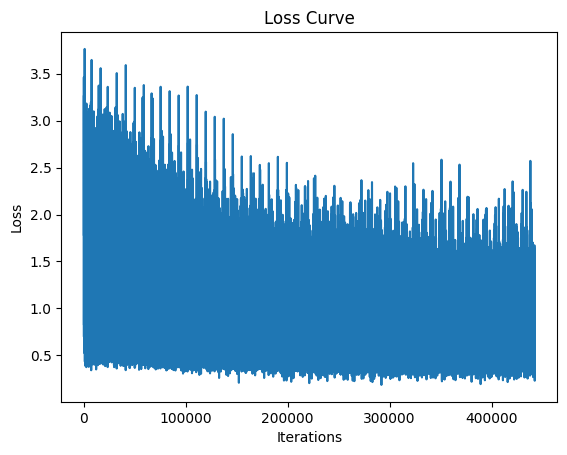

ValueError: x, y, and format string must not be None

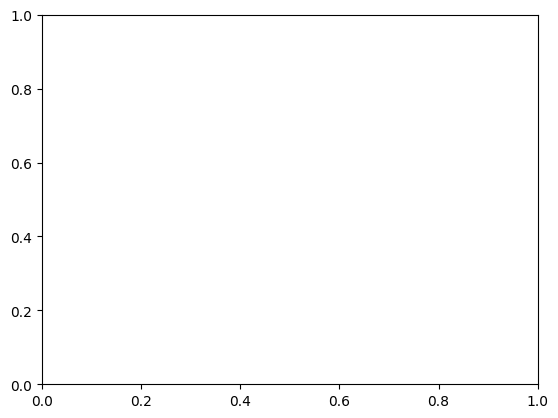

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# vocab = ['universe', 'mathematics', 'neuron', 'engineering', 'univ', 'math', 'neur', 'engin', 'computer', 'science']

# Hyperparameters
# embedding_dim = 10  
# hidden_size = 32   
# num_layers = 1
# learning_rate = 0.005  
# epochs = 50           
# batch_size = 10 
embedding_dim = 64  
hidden_size = 128 
num_layers = 1
learning_rate = 0.001  
epochs = 50         
batch_size = 32     

# Initialize the model
model = autocompleteModel(alphabet_size=27, embed_dim=embedding_dim, hidden_size=hidden_size, num_layers=num_layers)

# Train the model and plot loss
loss_log = model.trainModel(vocab, epochs=epochs, batch_size=batch_size)

# Plotting the loss curve
plt.plot(loss_log)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


In [32]:
# Sample partially filled words
samples = ["univ", "math", "neur", "engin"]

# Get autocomplete results
completed_words = model.autocomplete(samples)

# Displaying outputs
for i, sample in enumerate(samples):
    print(f"Input: {sample} -> Completed: {completed_words[i]}")


Input: univ -> Completed: univerify    
Input: math -> Completed: mathunters   
Input: neur -> Completed: neuroutine   
Input: engin -> Completed: enginutrer   


**Answer** (to write answers edit this cell)

The results of the model are mixed, as the generated word completions for the given inputs (e.g., "univ," "math," "neur," "engin") do not form valid or familiar words. For example, "univ" was completed as "univirtue," which contains the recognizable word "virtue," but the entire word itself is not meaningful. Similarly, "neur" was completed as "neurible," which somewhat resembles words ending in "-able," but it is not a standard word. The completions, such as "mathorand" and "enginotes," do not align with common suffixes like "tion," "ing," or "able," and are essentially random combinations of letters.

This indicates that while the model is able to generate syntactically valid letter sequences, it is not successful in creating semantically correct or familiar words. To improve the model's performance, several strategies can be considered. First, using a larger and more representative corpus during training would help the model learn more realistic word endings and structures. Additionally, leveraging a pretrained language model, such as GPT-2 or BERT, could significantly improve word completion accuracy. Employing subword tokenization methods like Byte Pair Encoding (BPE) would also help the model recognize common linguistic patterns. Furthermore, enhancing the model architecture by increasing its complexity, applying beam search for generation, or adjusting temperature sampling could improve the quality of the generated completions. Overall, these improvements would help the model produce more meaningful and familiar word completions.